In [1]:
import ipynb.fs.full.Bezier_Path_Generation as Bezier
from matplotlib import pyplot as plt
import math

In [2]:
P = [[-1, 2, 3, -0.5],
     [4, 9, 1, 7]]

limits = Bezier.gen_limits(P)
look_up_k, look_up_dist = Bezier.gen_look_up(100000, P)
path_x, path_y, path_k, path_dist = Bezier.gen_path(10000, look_up_k, look_up_dist, P)

In [3]:
def path_derivative(A, k):
    t = [0, 0]
    
    t[0] += A[0][0] * ((-3) * (1 - k) ** 2)
    t[1] += A[1][0] * ((-3) * (1 - k) ** 2)
    
    t[0] += A[0][1] * (3 * (1 - k) ** 2 + 3 * (-2) * k * (1 - k))
    t[1] += A[1][1] * (3 * (1 - k) ** 2 + 3 * (-2) * k * (1 - k))
    
    t[0] += A[0][2] * (3 * (2 * k) * (1 - k) + 3 * (k ** 2) * (-1))
    t[1] += A[1][2] * (3 * (2 * k) * (1 - k) + 3 * (k ** 2) * (-1))
    
    t[0] += A[0][3] * (3 * k ** 2)
    t[1] += A[1][3] * (3 * k ** 2)
    
    return t

def mag(vec):
    mag = 0
    
    for i in vec:
        mag += i ** 2
    
    return mag ** 0.5

def unit(vec):
    m = mag(vec)
    
    for i in range(len(vec)):
        vec[i] /= m
    
    return vec

def maximum(l):
    m = l[0]
    
    for i in l:
        if (i > m):
            m = i
    
    return m

def minimum(l):
    m = l[0]
    
    for i in l:
        if (i < m):
            m = i
    
    return m

In [4]:
def gen_curvature(A, path_k):
    unit_tangents = []
    tangent_derivative = []
    curvature = []
    
    for i in range(len(path_k)):
        unit_tangents.append(unit(path_derivative(A, path_k[i])))
        
        if (i != 0):
            tangent_derivative.append([(unit_tangents[i][0] - unit_tangents[i-1][0]) / (path_k[i] - path_k[i-1]), (unit_tangents[i][1] - unit_tangents[i-1][1]) / (path_k[i] - path_k[i-1])])
            
            curvature.append(mag(tangent_derivative[i-1]) / mag(path_derivative(A, path_k[i-1])))
    
    return curvature, unit_tangents

def plot_curvature(curvature, path_k):
    plt.xlim(0, 1)
    plt.ylim(0, maximum(curvature) * 1.1)
    plt.grid()
    plt.title("Curvature Along Curve")
    plt.ylabel("Curvature")
    plt.xlabel("k-value")
    plt.plot(path_k[:len(path_k) - 1], curvature, marker=".", markersize=4, markeredgecolor="purple")
    plt.show()

In [5]:
def gen_radii(curvature):
    radii = []

    for i in curvature:
        if (i != 0):
            radii.append(1 / i)
        else:
            radii.append(0)
    
    return radii

def plot_radii(radii, path_k):
    lim = maximum(radii)
    
    if (100 < lim):
        lim = 100
    
    plt.xlim(0, 1)
    plt.ylim(0, lim)
    plt.grid()
    plt.title("Radius of Arc Along Curve")
    plt.ylabel("Radius")
    plt.xlabel("k-value")
    plt.plot(path_k[:len(path_k) - 1], radii, marker=".", markersize=4, markeredgecolor="red")
    plt.show()

In [6]:
def gen_v(radii):
    mu_s = 0.629775622
    g = 9.81
    
    v = []

    for i in radii:
        v.append((g * mu_s * i) ** 0.5)
    
    return v

def plot_v(v, path_k):
    lim = maximum(v)
    
    if (100 < lim):
        lim = 100
    
    plt.xlim(0, 1)
    plt.ylim(0, lim)
    plt.grid()
    plt.title("Max Velocity Along Curve")
    plt.ylabel("Velocity")
    plt.xlabel("k-value")
    plt.plot(path_k[:len(path_k) - 1], v, marker=".", markersize=4, markeredgecolor="green")
    plt.show()

In [7]:
def gen_theta(unit_tangents):
    theta = []
    
    for i in unit_tangents:
        theta.append(math.atan2(i[1], i[0]))
    
    return theta

def plot_theta(theta, path_k):
    plt.xlim(0, 1)
    plt.ylim(-math.pi, math.pi)
    plt.grid()
    plt.title("Heading Angle Along Curve")
    plt.ylabel("Angle (radians)")
    plt.xlabel("k-value")
    plt.plot(path_k, theta, marker=".", markersize=4, markeredgecolor="saddlebrown")
    plt.show()

In [8]:
def gen_omega(theta, path_k):
    omega = []
    
    for i in range(len(theta)):
        if (i != 0):
            if (abs(theta[i] - theta[i-1]) > 1):
                if (theta[i] - theta[i-1] > 0):
                    omega.append((theta[i] - theta[i-1] - 2 * math.pi) / (path_k[i] - path_k[i - 1]))
                else:
                    omega.append((theta[i] - theta[i-1] + 2 * math.pi) / (path_k[i] - path_k[i - 1]))
            else:
                omega.append((theta[i] - theta[i-1]) / (path_k[i] - path_k[i - 1]))
    
    return omega

def plot_omega(omega, path_k):
    plt.xlim(0, 1)
    plt.ylim(minimum(omega) - 1, maximum(omega) + 1)
    plt.grid()
    plt.title("Angular Velocity Along Curve")
    plt.ylabel("Angular Velocity")
    plt.xlabel("k-value")
    plt.plot(path_k[:len(path_k)-1], omega, marker=".", markersize=4, markeredgecolor="royalblue")
    plt.show()

In [9]:
curvature, unit_tangents = gen_curvature(P, path_k)
radii = gen_radii(curvature)
v = gen_v(radii)
angles = gen_theta(unit_tangents)
omega = gen_omega(angles, path_k)

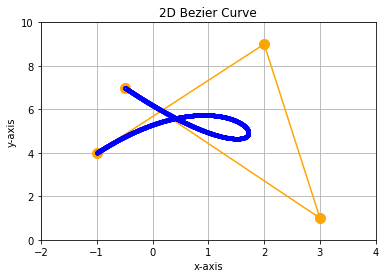

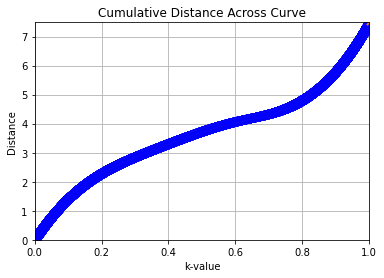

In [10]:
Bezier.plot_path(P, path_x, path_y, limits)
Bezier.plot_total_dist(look_up_k, look_up_dist, path_k, path_dist)

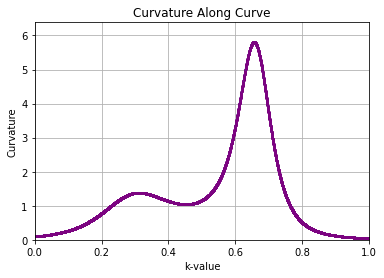

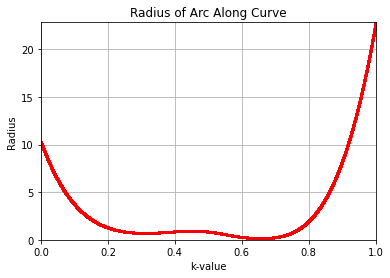

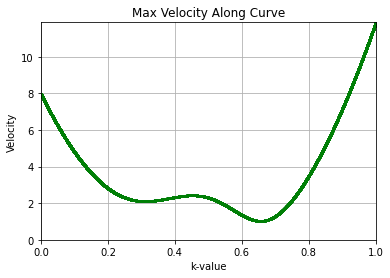

In [11]:
plot_curvature(curvature, path_k)
plot_radii(radii, path_k)
plot_v(v, path_k)

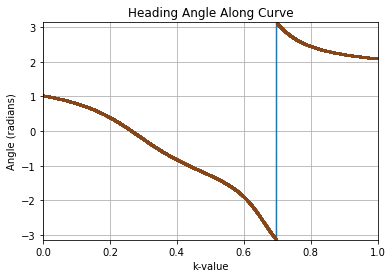

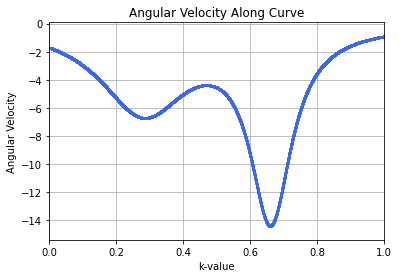

In [12]:
plot_theta(angles, path_k)
plot_omega(omega, path_k)